In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.utils.multiclass import unique_labels

from deepchecks.checks import ClassPerformanceImbalanceCheck
from deepchecks.base import Dataset


In [2]:
iris = load_iris(as_frame=True)
train, test = train_test_split(iris.frame, test_size=0.33, random_state=42)

train_ds = Dataset(train, label="target")
test_ds = Dataset(test, label="target")

clf = AdaBoostClassifier().fit(train_ds.features_columns(), train_ds.label_col())

Class Performance Imbalance

Visualize class imbalance by displaying the difference between class metrics.

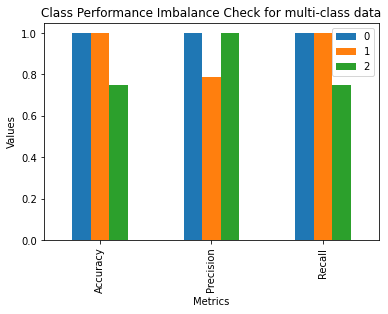

In [3]:
check = ClassPerformanceImbalanceCheck()
check.run(test_ds, clf)

## Initializing check instance with custom metrics

Class Performance Imbalance

Visualize class imbalance by displaying the difference between class metrics.

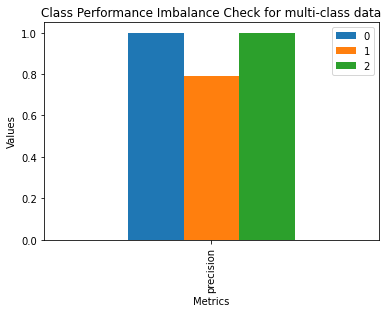

In [4]:
def calculate_precision_score(model, features, labels):
    y_pred = model.predict(features)
    u_labels = unique_labels(y_pred, labels)
    return dict(zip(u_labels, precision_score(labels, y_pred, labels=u_labels, average=None)))


metrics = {
    "precision": calculate_precision_score,
}

check = ClassPerformanceImbalanceCheck(alternative_metrics=metrics)
check.run(test_ds, clf)